In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt 

import sklearn as sk

## Datasets 

In [71]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=5.0, random_state=1)

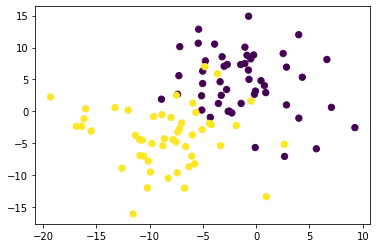

In [72]:
plt.scatter(X[:, 0], X[:, 1], 40, c=y)

In [6]:
pd.DataFrame(np.concatenate((X, y.reshape(-1, 1)), axis=1), columns=('x1', 'x2', 'y')).head(10)

,x1,x2,y
0,8.458252,5.860303,0.0
1,-7.772795,2.953104,1.0
2,-10.433878,3.702074,1.0
3,8.465934,7.638523,0.0
4,10.361608,7.154671,0.0
5,-9.007260,5.147299,1.0
6,-9.985826,5.545882,1.0
7,-11.733671,2.721021,1.0
8,-11.237491,4.665514,1.0
9,-10.426360,4.087736,1.0


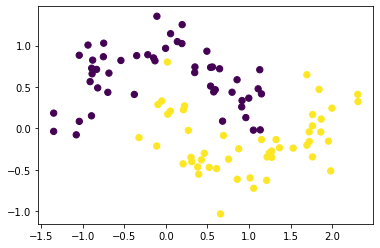

In [19]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], 40, c=y)

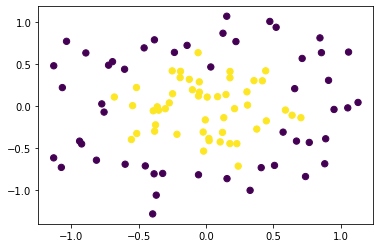

In [23]:
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, random_state=1, factor=0.4)
plt.scatter(X[:, 0], X[:, 1], 40, c=y)

In [35]:
def make_reg(nsamples=100, noise=0.1, alpha=1.0):
    x = 10*np.random.rand(nsamples)
    y = np.sin(alpha * x) + noise * np.random.randn(nsamples)
    return x, y

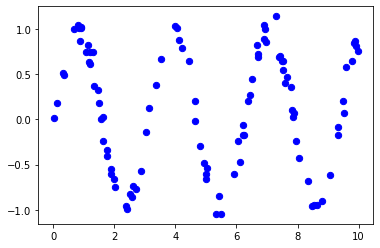

In [37]:
x, y = make_reg(noise=0.1, alpha=2)
plt.scatter(x, y, 40, c='blue')

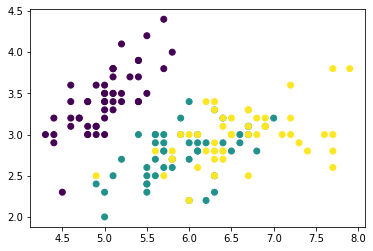

In [41]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

plt.scatter(X[:, 0], X[:, 1], c=y)

/tmp/ipykernel_3472/1917436490.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = p3.Axes3D(fig)


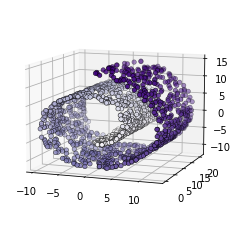

In [68]:
from sklearn.datasets import make_swiss_roll
import mpl_toolkits.mplot3d.axes3d as p3
X, y = make_swiss_roll(n_samples=1500, noise=0.05)

fig = plt.figure(figsize=(4, 3))
ax = p3.Axes3D(fig)
ax.view_init(10, -70)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=20, c=y, cmap='Purples', edgecolor='k', linewidth=0.5)

In [42]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/srg/scikit_learn_data


In [43]:
faces.images.shape

(400, 64, 64)

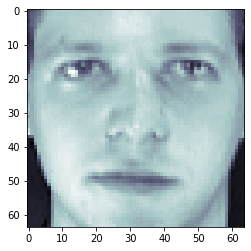

In [52]:
plt.imshow(faces.images[0], cmap=plt.cm.bone)

## Model

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [58]:
model.fit(X, y)

LogisticRegression()

## Predictions 

In [59]:
model.score(X, y)

0.9

In [128]:
model.predict(X)

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [130]:
model.predict_proba(X)[:5, :]

array([[0.54912266, 0.45087734],
       [0.01866012, 0.98133988],
       [0.21501336, 0.78498664],
       [0.99260639, 0.00739361],
       [0.72008762, 0.27991238]])

### 2D Visualization

In [123]:
def plot_2d_separator(classifier, X, fill=False, twocolor=False, line=True, ax=None, eps=None) :
    if eps is None:
        eps = 1.0 #X. std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1001)
    yy = np.linspace(y_min, y_max, 1001)
                     
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
                     
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision function
        try:
            decision_values = classifier.predict_proba (X_grid)[:, 1]
        except:
            decision_values = classifier.predict(X_grid)
        levels = [.5]
        fill_levels = [0, .5, 1]
                     
    if ax is None:
        ax = plt.gca()
                     
    if fill:
        c = decision_values.reshape(X1. shape)
        if twocolor:
            print(fill_levels)
            ax.contourf(X1, X2, c,
            levels=fill_levels, colors=['#FF9999', '#0000FF'], alpha=0.2)
            ax.contour(X1, X2, c,
            levels=np.linspace(c.min(), c.max(), 15), alpha=0.5, colors="white")
        else:
            ax.contourf(X1, X2, c,
            levels=np.linspace(c.min(), c.max(), 30), cmap=plt.cm.binary, alpha=0.5)
            ax.contour(X1, X2, c,
            levels=np.linspace(c.min(), c.max(), 30), alpha=0.5, colors="white")
    if line:
        ax.contour(X1, X2, decision_values. reshape (X1. shape), levels=levels, colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [124]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

[-12.691457637383031, 0, 13.869105361014341]


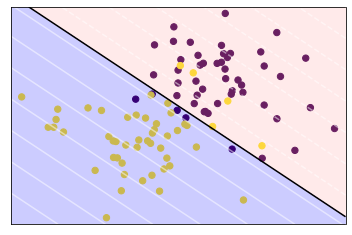

In [125]:
plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

## Transform

[0, 0.5, 1]


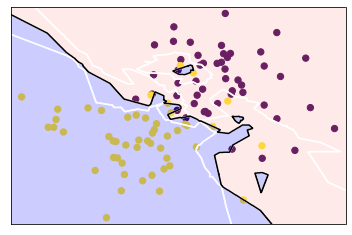

In [132]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

[0, 0.5, 1]


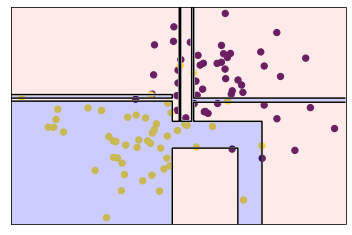

In [133]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier() # max_depth = 3

model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

[0, 0.5, 1]


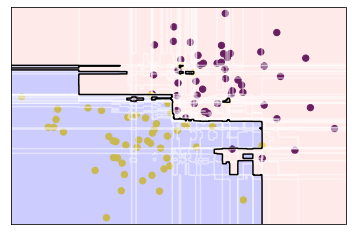

In [134]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

[-1.4436702018230985, 0, 1.9679345422900414]


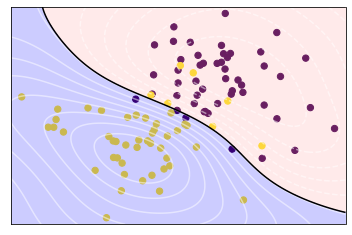

In [135]:
from sklearn.svm import SVC

model = SVC()

model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

[-1.7002913222676244, 0, 1.8077372422385423]


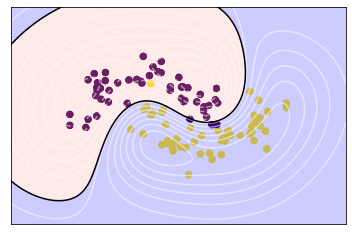

In [136]:
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.2, random_state=1)
plt.scatter(X[:, 0], X[:, 1], 40, c=y)

model = SVC(kernel='rbf')

model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], 40, c=y)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

[-1.6480923154099574, 0, 1.6095978562755235]


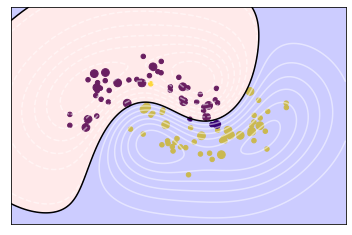

In [138]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

model.fit(X_train, y_train)

plt.scatter(X_train[:, 0], X_train[:, 1], 20, c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], 60, c=y_test)
plot_2d_separator(model, X, fill=True, twocolor=True, line=True, ax=None, eps=None)

In [139]:
model.score(X_test, y_test)

0.96

# Cross Validation

In [147]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

In [148]:
for train_index, test_index in kf.split(np.zeros(10)):
    print(train_index, test_index)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [149]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=10)

array([1. , 0.9, 1. , 1. , 1. , 1. , 0.9, 1. , 0.8, 1. ])

In [150]:
models = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    print(model.__str__().split('(')[0], np.mean(cvs).round(3))

LogisticRegression 0.83
KNeighborsClassifier 0.97
DecisionTreeClassifier 0.93
RandomForestClassifier 0.97
SVC 0.96


In [153]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()

from sklearn.model_selection import cross_val_predict

In [154]:
a1 = cross_val_predict(model1, X, y, cv=10, method='predict_proba')
a2 = cross_val_predict(model2, X, y, cv=10, method='predict_proba')

Text(0, 0.5, 'RandomForest')

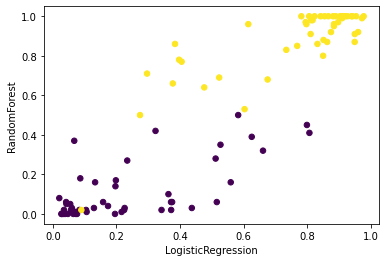

In [156]:
plt.scatter(a1[:, 1], a2[:, 1], 30, c=y)
plt.xlabel('LogisticRegression')
plt.ylabel('RandomForest')

## Utils 

In [157]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

### Data research

model.predict:
1.  Classification
2.  Regression
3.  Clustering
    
model.transform:
1. Preprocessing (normalization)
2. Dimensionality Reduction ($R^n \to R^m, m < n$)
3. Feature Extraction (finding features)
4. Feature selection

### Confusion matrix
Confusion matrix whose i-th row and j-th column entry indicates the number of samples with true label being i-th class and predicted label being j-th class.

In [164]:
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[11,  3],
       [ 2,  9]])

Text(0.5, 0, 'preds')

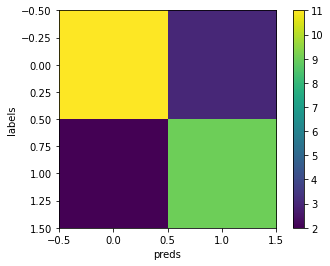

In [165]:
plt.imshow(cm)
plt.colorbar()
plt.ylabel('labels')
plt.xlabel('preds')

### Classification report 

In [163]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.75      0.82      0.78        11

    accuracy                           0.80        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.80      0.80      0.80        25



## Split data

#### KFold

In [5]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)

X = np.arange(10)

for train_index, test_index in kf.split(X):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [5 6 7 8 9], TEST: [0 1 2 3 4]
TRAIN: [0 1 2 3 4], TEST: [5 6 7 8 9]


#### GroupKFold

In [11]:
from sklearn.model_selection import GroupKFold
group_kf = GroupKFold(n_splits=3) # does not break groups down into folds

X = np.arange(12)
y = np.random.randint(1, 3, 12)
groups = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

for train_index, test_index in group_kf.split(X, y, groups):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [0 1 2 3 6 7 8 9], TEST: [ 4  5 10 11]
TRAIN: [ 0  1  4  5  6  7 10 11], TEST: [2 3 8 9]
TRAIN: [ 2  3  4  5  8  9 10 11], TEST: [0 1 6 7]


#### Shuffle split

In [13]:
from sklearn.model_selection import ShuffleSplit
sh = ShuffleSplit(n_splits=3, test_size=.2, random_state=1)

for train_index, test_index in sh.split(X):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [10  1  6  0  7 11  9  8  5], TEST: [2 3 4]
TRAIN: [ 3  8 10  5 11  4  2  9  6], TEST: [1 7 0]
TRAIN: [10  6  0  8  1  9  7  4  2], TEST: [11  5  3]


#### StratifiedKFold

In [21]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)

for train_index, test_index in skf.split(X, y, groups):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [ 3  5  6  7  8  9 10 11], TEST: [0 1 2 4]
TRAIN: [ 0  1  2  4  8  9 10 11], TEST: [3 5 6 7]
TRAIN: [0 1 2 3 4 5 6 7], TEST: [ 8  9 10 11]


In [15]:
y

array([1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2])

#### GroupShuffleSplit

In [18]:
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=3)

for train_index, test_index in gss.split(X, y, groups):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [ 2  3  4  5  8  9 10 11], TEST: [0 1 6 7]
TRAIN: [ 0  1  4  5  8  9 10 11], TEST: [2 3 6 7]
TRAIN: [0 1 4 5 6 7 8 9], TEST: [ 2  3 10 11]


#### StratifiedShuffleSplit

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=3)

for train_index, test_index in sss.split(X, y, groups):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [11  0  4  3  8  6 10  1  9  7], TEST: [2 5]
TRAIN: [ 6  8 11  3  1  4  2  0  9 10], TEST: [5 7]
TRAIN: [ 0  7  9  3  6  1  4 11  8 10], TEST: [5 2]


#### TimeSeriesSplit

In [23]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=2)

for train_index, test_index in tss.split(X):
    print(f'TRAIN: {train_index}, TEST: {test_index}')
    X_train, X_test = X[train_index], X[test_index]

TRAIN: [0 1 2 3], TEST: [4 5 6 7]
TRAIN: [0 1 2 3 4 5 6 7], TEST: [ 8  9 10 11]


## Evaluation 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

cv = ShuffleSplit(n_splits=3)
cross_val_score(LogisticRegression(), X, y, cv=cv)

array([0.8, 0.8, 0.8])

## FeatureSelection

In [30]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X, y = load_iris(return_X_y=True)
print(X.shape)
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
print(X_new.shape)

(150, 4)
(150, 2)


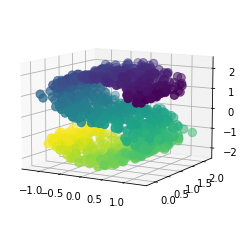

In [75]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_s_curve
from sklearn.manifold import Isomap

X, y = make_s_curve(n_samples=1000, noise=.1)

ax = plt.axes(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=y, s=70)
ax.view_init(10, -60)

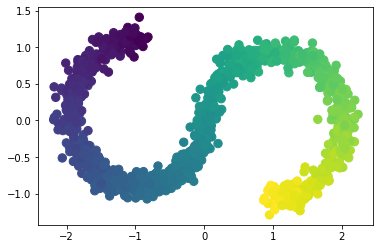

In [76]:
X_pca = PCA(n_components=2).fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=70)

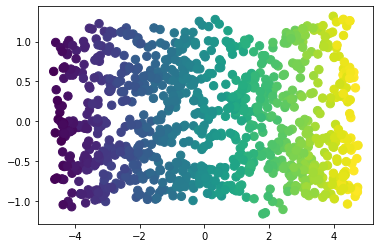

In [78]:
iso = Isomap(n_neighbors=15, n_components=2)
X_iso = iso.fit_transform(X)
plt.scatter(X_iso[:, 0], X_iso[:, 1], c=y, s=70)

## Pipelines

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(SelectKBest(chi2, k=2), LogisticRegression())
pipeline.fit(X, y)
pipeline.score(X, y)

0.9666666666666667

## Preprocessing

#### StdScaler

mean = -2.282325235874465, std = 6.483577540263439


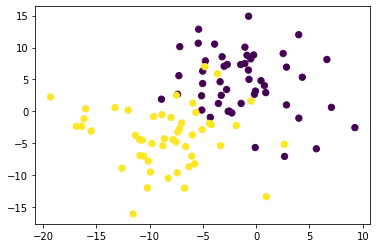

In [39]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, cluster_std=5.0, random_state=1)

print(f'mean = {np.mean(X)}, std = {np.std(X)}')
plt.scatter(X[:, 0], X[:, 1], 40, c=y)

mean = -1.7763568394002506e-16, std = 0.9999999999999999


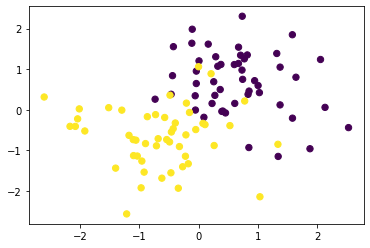

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print(f'mean = {np.mean(X_scaled)}, std = {np.std(X_scaled)}')
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 40, c=y)

#### LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder

f = ['a', 'xyz', '123', 123, 123, 17, 'a']
encoder = LabelEncoder()
encoder.fit(f)
encoder.transform(f)

array([2, 3, 0, 0, 0, 1, 2])

#### Adding feature polynomials

In [45]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
f = np.array([[1, 2], [2, 1], [1, 1]])

pf.fit(f)
pd.DataFrame(pf.transform(f), columns=('', 'x1', 'x2', 'x1^2', 'x1*x2', 'x2^2'))

,,x1,x2,x1^2,x1*x2,x2^2
0,1.0,1.0,2.0,1.0,2.0,4.0
1,1.0,2.0,1.0,4.0,2.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0


#### Matrix decomposition

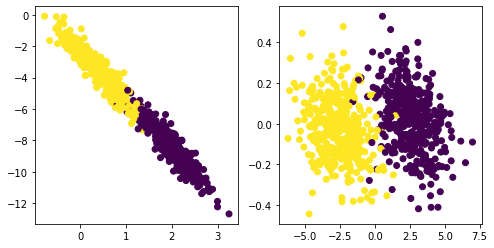

In [72]:
from sklearn.decomposition import PCA

centers = [[-5, -5], [-5, -1]]
X, y = make_blobs(n_samples=800, centers=centers, random_state=40)
transformation = [[-0.004, 0.5], [-0.4, 1.2]]
X = np.dot(X, transformation)

pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)

fig, axes = plt.subplots(figsize=(8, 4), nrows=1, ncols=2)
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=y)

## Texts

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

X = [
    'Some say the world will end in fire',
    'Some say in ice']


vectorizer = CountVectorizer()
vectorizer.fit(X)
vectorizer.vocabulary_
{
    'end': 0,
    'fire': 1,
    'ice': 2,
    'in': 3,
    'say': 4,
    'some': 5,
    'the': 6, 
    'will': 7,
    'world': 8
}


X_words_matrix = vectorizer.transform(X)
X_words_matrix.toarray()

array([[1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 1, 1, 1, 1, 0, 0, 0]])